In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = 'https://data.cdc.gov/api/views/9j2v-jamp/rows.csv?accessType=DOWNLOAD'

In [ ]:
#import data and find total death rates
df = pd.read_csv('Suicide_death_rates.csv')
df = df[(df['UNIT'] =='Deaths per 100,000 resident population, crude')&(df['YEAR']>=1980)]
df = df.drop(columns = ['INDICATOR', 'UNIT_NUM', 'YEAR_NUM', 'FLAG', 'STUB_NAME_NUM'])
df = df.sort_values(by = 'YEAR')
df.head(3)

,UNIT,STUB_NAME,STUB_LABEL,STUB_LABEL_NUM,YEAR,AGE,AGE_NUM,ESTIMATE
698,"Deaths per 100,000 resident population, crude",Total,All persons,0.000,1980,All ages,0.0,11.9
1613,"Deaths per 100,000 resident population, crude",Sex and age,Male: 15-19 years,3.121,1980,15-19 years,2.1,13.8
4428,"Deaths per 100,000 resident population, crude","Sex, age and race",Female: American Indian or Alaska Native: 65 y...,5.235,1980,65 years and over,5.0,NaN


In [ ]:
#everyone all races, genders, ages
df_total=df[(df['STUB_NAME'] == 'Total')&(df['STUB_LABEL'] == 'All persons')]
# df_total = df_total.sort_values(by='YEAR')
#males and females
df_males =df[(df['STUB_NAME'] == 'Sex')&(df['STUB_LABEL']=='Male')]
df_females = df[(df['STUB_NAME'] == 'Sex')&(df['STUB_LABEL']=='Female')]
df_females.head(3)

,UNIT,STUB_NAME,STUB_LABEL,STUB_LABEL_NUM,YEAR,AGE,AGE_NUM,ESTIMATE
1487,"Deaths per 100,000 resident population, crude",Sex,Female,2.2,1980,All ages,0.0,5.5
1488,"Deaths per 100,000 resident population, crude",Sex,Female,2.2,1981,All ages,0.0,5.8
1489,"Deaths per 100,000 resident population, crude",Sex,Female,2.2,1982,All ages,0.0,5.6


In [ ]:
#males with imputed missing values using the mean
df_race_m_aai = df[(df['STUB_NAME'] == 'Sex and race')&(df['STUB_LABEL']=='Male: American Indian or Alaska Native')]

mean_value_80 = df_race_m_aai[df_race_m_aai['YEAR'].isin([1980, 1985])]['ESTIMATE'].mean()
mean_value_85 = df_race_m_aai[df_race_m_aai['YEAR'].isin([1985, 1990])]['ESTIMATE'].mean()
df_race_m_aai.loc[df_race_m_aai['ESTIMATE'].isna() & df_race_m_aai['YEAR'].isin([1981, 1982, 1983, 1984]), 'ESTIMATE'] = mean_value_80
df_race_m_aai.loc[df_race_m_aai['ESTIMATE'].isna() & df_race_m_aai['YEAR'].isin([1986, 1987]), 'ESTIMATE'] = mean_value_85

In [ ]:
#males with imputed missing values using the mean
df_race_m_api = df[(df['STUB_NAME'] == 'Sex and race')&(df['STUB_LABEL']=='Male: Asian or Pacific Islander')]
mean_value_80 = df_race_m_api[df_race_m_api['YEAR'].isin([1980, 1985])]['ESTIMATE'].mean()
mean_value_85 = df_race_m_api[df_race_m_api['YEAR'].isin([1985, 1990])]['ESTIMATE'].mean()
df_race_m_api.loc[df_race_m_api['ESTIMATE'].isna() & df_race_m_api['YEAR'].isin([1981, 1982, 1983, 1984]), 'ESTIMATE'] = mean_value_80
df_race_m_api.loc[df_race_m_api['ESTIMATE'].isna() & df_race_m_api['YEAR'].isin([1986, 1987]), 'ESTIMATE'] = mean_value_85

In [ ]:
#males and females
df_race_m_w =df[(df['STUB_NAME'] == 'Sex and race')&(df['STUB_LABEL']=='Male: White')]
df_race_m_b =df[(df['STUB_NAME'] == 'Sex and race')&(df['STUB_LABEL']=='Male: Black or African American')]
df_race_f_w =df[(df['STUB_NAME'] == 'Sex and race')&(df['STUB_LABEL']=='Female: White')]
df_race_f_b =df[(df['STUB_NAME'] == 'Sex and race')&(df['STUB_LABEL']=='Female: Black or African American')]

In [ ]:
#females with imputed missing values using the mean
df_race_f_aai =df[(df['STUB_NAME'] == 'Sex and race')&(df['STUB_LABEL']=='Female: American Indian or Alaska Native')]
mean_value_80 = df_race_f_aai[df_race_f_aai['YEAR'].isin([1980, 1985])]['ESTIMATE'].mean()
mean_value_85 = df_race_f_aai[df_race_f_aai['YEAR'].isin([1985, 1990])]['ESTIMATE'].mean()
df_race_f_aai.loc[df_race_f_aai['ESTIMATE'].isna() & df_race_f_aai['YEAR'].isin([1981, 1982, 1983, 1984]), 'ESTIMATE'] = mean_value_80
df_race_f_aai.loc[df_race_f_aai['ESTIMATE'].isna() & df_race_f_aai['YEAR'].isin([1986, 1987]), 'ESTIMATE'] = mean_value_85

In [ ]:
#females with imputed missing values using the mean
df_race_f_api = df[(df['STUB_NAME'] == 'Sex and race')&(df['STUB_LABEL']=='Female: Asian or Pacific Islander')]
mean_value_80 = df_race_f_api[df_race_f_api['YEAR'].isin([1980, 1985])]['ESTIMATE'].mean()
mean_value_85 = df_race_f_api[df_race_f_api['YEAR'].isin([1985, 1990])]['ESTIMATE'].mean()
df_race_f_api.loc[df_race_f_api['ESTIMATE'].isna() & df_race_f_api['YEAR'].isin([1981, 1982, 1983, 1984]), 'ESTIMATE'] = mean_value_80
df_race_f_api.loc[df_race_f_api['ESTIMATE'].isna() & df_race_f_api['YEAR'].isin([1986, 1987]), 'ESTIMATE'] = mean_value_85

In [ ]:
#male and female age breakdown
both_10_14 = df[(df['STUB_NAME']== 'Age')&(df['STUB_LABEL']=='10-14 years')]
both_15_19 = df[(df['STUB_NAME']== 'Age')&(df['STUB_LABEL']=='15-19 years')]
both_20_24 = df[(df['STUB_NAME']== 'Age')&(df['STUB_LABEL']=='20-24 years')]
both_25_34 = df[(df['STUB_NAME']== 'Age')&(df['STUB_LABEL']=='25-34 years')]
both_35_44 = df[(df['STUB_NAME']== 'Age')&(df['STUB_LABEL']=='35-44 years')]
both_45_54 = df[(df['STUB_NAME']== 'Age')&(df['STUB_LABEL']=='45-54 years')]
both_55_64 = df[(df['STUB_NAME']== 'Age')&(df['STUB_LABEL']=='55-64 years')]
both_65_74 = df[(df['STUB_NAME']== 'Age')&(df['STUB_LABEL']=='65-74 years')]
both_75_84 = df[(df['STUB_NAME']== 'Age')&(df['STUB_LABEL']=='75-84 years')]
both_85_over = df[(df['STUB_NAME']== 'Age')&(df['STUB_LABEL']=='85 years and over')]

In [ ]:
#male age breakdown
m_10_14 = df[(df['STUB_NAME']== 'Sex and age')&(df['STUB_LABEL']=='Male: 10-14 years')]
m_15_19 = df[(df['STUB_NAME']== 'Sex and age')&(df['STUB_LABEL']=='Male: 15-19 years')]
m_20_24 = df[(df['STUB_NAME']== 'Sex and age')&(df['STUB_LABEL']=='Male: 20-24 years')]
m_25_34 = df[(df['STUB_NAME']== 'Sex and age')&(df['STUB_LABEL']=='Male: 25-34 years')]
m_35_44 = df[(df['STUB_NAME']== 'Sex and age')&(df['STUB_LABEL']=='Male: 35-44 years')]
m_45_54 = df[(df['STUB_NAME']== 'Sex and age')&(df['STUB_LABEL']=='Male: 45-54 years')]
m_55_64 = df[(df['STUB_NAME']== 'Sex and age')&(df['STUB_LABEL']=='Male: 55-64 years')]
m_65_74 = df[(df['STUB_NAME']== 'Sex and age')&(df['STUB_LABEL']=='Male: 65-74 years')]
m_75_84 = df[(df['STUB_NAME']== 'Sex and age')&(df['STUB_LABEL']=='Male: 75-84 years')]
m_85_over = df[(df['STUB_NAME']== 'Sex and age')&(df['STUB_LABEL']=='Male: 85 years and over')]

In [ ]:
#female age breakdown
f_10_14 = df[(df['STUB_NAME']== 'Sex and age')&(df['STUB_LABEL']=='Female: 10-14 years')]
f_15_19 = df[(df['STUB_NAME']== 'Sex and age')&(df['STUB_LABEL']=='Female: 15-19 years')]
f_20_24 = df[(df['STUB_NAME']== 'Sex and age')&(df['STUB_LABEL']=='Female: 20-24 years')]
f_25_34 = df[(df['STUB_NAME']== 'Sex and age')&(df['STUB_LABEL']=='Female: 25-34 years')]
f_35_44 = df[(df['STUB_NAME']== 'Sex and age')&(df['STUB_LABEL']=='Female: 35-44 years')]
f_45_54 = df[(df['STUB_NAME']== 'Sex and age')&(df['STUB_LABEL']=='Female: 45-54 years')]
f_55_64 = df[(df['STUB_NAME']== 'Sex and age')&(df['STUB_LABEL']=='Female: 55-64 years')]
f_65_74 = df[(df['STUB_NAME']== 'Sex and age')&(df['STUB_LABEL']=='Female: 65-74 years')]
f_75_84 = df[(df['STUB_NAME']== 'Sex and age')&(df['STUB_LABEL']=='Female: 75-84 years')]
f_85_over = df[(df['STUB_NAME']== 'Sex and age')&(df['STUB_LABEL']=='Female: 85 years and over')]

In [ ]:
#hispanic males
hispanic_m = df[(df['STUB_NAME']== 'Sex and race and Hispanic origin')&(df['STUB_LABEL']=='Male: Hispanic or Latino: All races')]
mean_value_85 = hispanic_m[hispanic_m['YEAR'].isin([1985, 1990])]['ESTIMATE'].mean()
hispanic_m.loc[hispanic_m['ESTIMATE'].isna() & hispanic_m['YEAR'].isin([1980, 1981, 1982, 1983, 1984, 1985]), 'ESTIMATE'] = mean_value_85
hispanic_f = df[(df['STUB_NAME']== 'Sex and race and Hispanic origin')&(df['STUB_LABEL']=='Female: Hispanic or Latino: All races')]
mean_value_85 = hispanic_f[hispanic_f['YEAR'].isin([1985, 1990])]['ESTIMATE'].mean()
hispanic_f.loc[hispanic_f['ESTIMATE'].isna() & hispanic_f['YEAR'].isin([1980, 1981, 1982, 1983, 1984, 1985]), 'ESTIMATE'] = mean_value_85
hispanic_f

,UNIT,STUB_NAME,STUB_LABEL,STUB_LABEL_NUM,YEAR,AGE,AGE_NUM,ESTIMATE
4887,"Deaths per 100,000 resident population, crude",Sex and race and Hispanic origin,Female: Hispanic or Latino: All races,6.23,1980,All ages,0.0,1.9
4888,"Deaths per 100,000 resident population, crude",Sex and race and Hispanic origin,Female: Hispanic or Latino: All races,6.23,1981,All ages,0.0,1.9
4889,"Deaths per 100,000 resident population, crude",Sex and race and Hispanic origin,Female: Hispanic or Latino: All races,6.23,1982,All ages,0.0,1.9
4890,"Deaths per 100,000 resident population, crude",Sex and race and Hispanic origin,Female: Hispanic or Latino: All races,6.23,1983,All ages,0.0,1.9
4891,"Deaths per 100,000 resident population, crude",Sex and race and Hispanic origin,Female: Hispanic or Latino: All races,6.23,1984,All ages,0.0,1.9
4892,"Deaths per 100,000 resident population, crude",Sex and race and Hispanic origin,Female: Hispanic or Latino: All races,6.23,1985,All ages,0.0,1.6
4893,"Deaths per 100,000 resident population, crude",Sex and race and Hispanic origin,Female: Hispanic or Latino: All races,6.23,1986,All ages,0.0,1.9
4894,"Deaths per 100,000 resident population, crude",Sex and race and Hispanic origin,Female: Hispanic or Latino: All races,6.23,1987,All ages,0.0,1.6
4895,"Deaths per 100,000 resident population, crude",Sex and race and Hispanic origin,Female: Hispanic or Latino: All races,6.23,1988,All ages,0.0,1.8
4896,"Deaths per 100,000 resident population, crude",Sex and race and Hispanic origin,Female: Hispanic or Latino: All races,6.23,1989,All ages,0.0,2.4


In [ ]:
consolidated_df = pd.concat([df_total, df_males, df_females, df_race_m_aai, df_race_m_api, df_race_m_w, df_race_m_b,
df_race_f_w, df_race_f_b, df_race_f_aai, df_race_f_api, both_10_14, both_10_14, both_15_19, both_20_24, both_25_34, both_35_44,
                            both_45_54, both_55_64, both_65_74, both_75_84, both_85_over, m_10_14, m_15_19, m_20_24, m_25_34,
                            m_35_44, m_45_54, m_55_64, m_65_74, m_75_84, m_85_over, f_10_14, f_15_19, f_20_24, f_25_34, f_35_44,
                            f_45_54, f_55_64, f_65_74, f_75_84, f_85_over, hispanic_f, hispanic_m], axis=0)
consolidated_df

,UNIT,STUB_NAME,STUB_LABEL,STUB_LABEL_NUM,YEAR,AGE,AGE_NUM,ESTIMATE
698,"Deaths per 100,000 resident population, crude",Total,All persons,0.00,1980,All ages,0.0,11.9
728,"Deaths per 100,000 resident population, crude",Total,All persons,0.00,1981,All ages,0.0,12.0
817,"Deaths per 100,000 resident population, crude",Total,All persons,0.00,1982,All ages,0.0,12.2
818,"Deaths per 100,000 resident population, crude",Total,All persons,0.00,1983,All ages,0.0,12.1
819,"Deaths per 100,000 resident population, crude",Total,All persons,0.00,1984,All ages,0.0,12.4
...,...,...,...,...,...,...,...,...
4755,"Deaths per 100,000 resident population, crude",Sex and race and Hispanic origin,Male: Hispanic or Latino: All races,6.13,2014,All ages,0.0,9.2
4756,"Deaths per 100,000 resident population, crude",Sex and race and Hispanic origin,Male: Hispanic or Latino: All races,6.13,2015,All ages,0.0,9.0
4757,"Deaths per 100,000 resident population, crude",Sex and race and Hispanic origin,Male: Hispanic or Latino: All races,6.13,2016,All ages,0.0,10.1
4758,"Deaths per 100,000 resident population, crude",Sex and race and Hispanic origin,Male: Hispanic or Latino: All races,6.13,2017,All ages,0.0,10.7


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


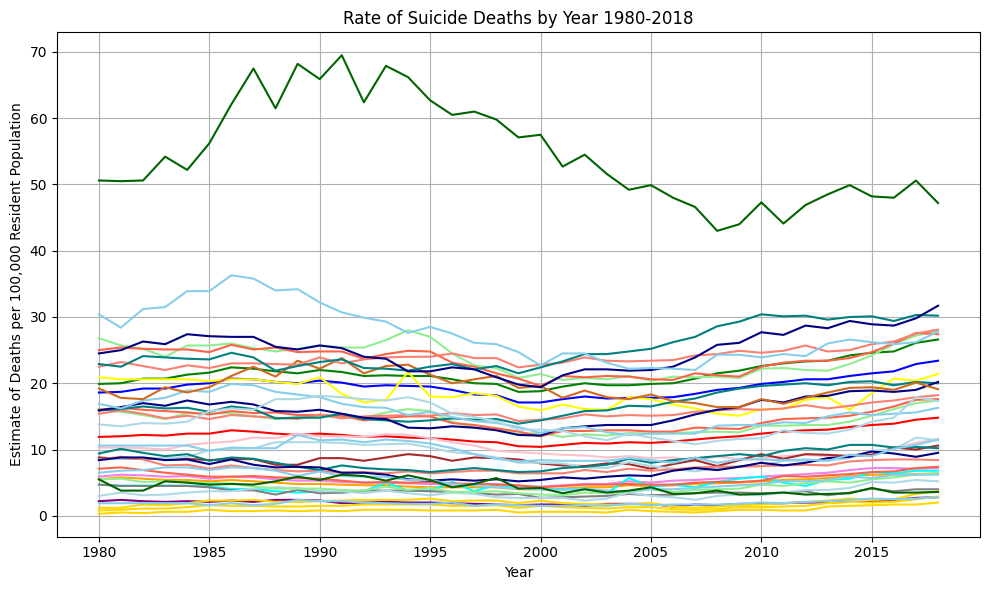

In [ ]:
# Create a list of tuples with DataFrame, color, and label information
plot_data = [
    (df_total, 'red', 'Total'),
    (df_males, 'blue', 'Males'),
    (df_females, 'orange', 'Females'),
    (df_race_m_w, 'green', 'White males'),
    (df_race_m_b, 'pink', 'Black or African American males'),
    (df_race_m_aai, 'yellow', 'American Indian or Alaska Native males'),
    (df_race_m_api, 'brown', 'Asian or Pacific Islander males'),
    (df_race_f_w, 'violet', 'White females'),
    (df_race_f_b, 'purple', 'Black or African American females'),
    (df_race_f_aai, 'cyan', 'American Indian or Alaska Native females'),
    (df_race_f_api, 'gray', 'Asian or Pacific Islander females'),
    (both_10_14, 'gold', 'Males and females 10-14 years'),
    (both_15_19, 'lightblue', 'Males and females 15-19 years'),
    (both_20_24, 'lightgreen', 'Males and females 20-24 years'),
    (both_25_34, 'tomato', 'Males and females 25-34 years'),
    (both_35_44, 'salmon', 'Males and females 35-44 years'),
    (both_45_54, 'teal', 'Males and females 45-54 years'),
    (both_55_64, 'navy', 'Males and females 55-64 years'),
    (both_65_74, 'skyblue', 'Males and females 65-74 years'),
    (both_85_over, 'chocolate', 'Males and females 85 years and over'),
    (m_10_14, 'gold', 'Males 10-14 years'),
    (m_15_19, 'lightblue', 'Males 15-19 years'),
    (m_20_24, 'lightgreen', 'Males 20-24 years'),
    (m_25_34, 'tomato', 'Males 25-34 years'),
    (m_35_44, 'salmon', 'Males 35-44 years'),
    (m_45_54, 'teal', 'Males 45-54 years'),
    (m_55_64, 'navy', 'Males 55-64 years'),
    (m_65_74, 'skyblue', 'Males 65-74 years'),
    (m_85_over, 'darkgreen', 'Males 85 years and over'),
    (f_10_14, 'gold', 'Females 10-14 years'),
    (f_15_19, 'lightblue', 'Females 15-19 years'),
    (f_20_24, 'lightgreen', 'Females 20-24 years'),
    (f_25_34, 'tomato', 'Females 25-34 years'),
    (f_35_44, 'salmon', 'Females 35-44 years'),
    (f_45_54, 'teal', 'Females 45-54 years'),
    (f_55_64, 'navy', 'Females 55-64 years'),
    (f_65_74, 'skyblue', 'Females 65-74 years'),
    (f_85_over, 'darkgreen', 'Females 85 years and over'),
    (hispanic_m, 'skyblue', 'Hispanic or Latino males'),
    (hispanic_f, 'skyblue', 'Hispanic or Latino females'),
]
plt.figure(figsize=(10, 6))
# Loop through the data to create plots
for (df, color, label) in plot_data:
    plt.plot(df['YEAR'], df['ESTIMATE'], color=color, label=label)

# Optional: Add labels, title, and legend
plt.title('Rate of Suicide Deaths by Year 1980-2018')
plt.xlabel('Year')
plt.ylabel('Estimate of Deaths per 100,000 Resident Population')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), handlelength=2)  # Moves the legend to the left center outside
plt.grid()
plt.tight_layout()
plt.show()

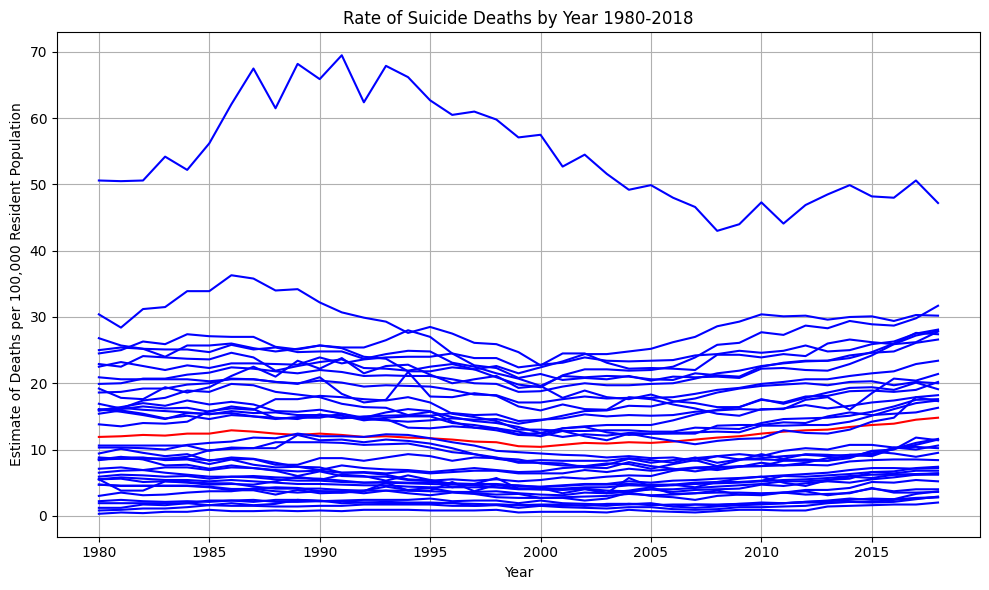

In [ ]:
# Create a list of tuples with DataFrame, color, and label information
plot_data = [
    (df_total, 'red', 'Total'),
    (df_males, 'blue', 'Males'),
    (df_females, 'blue', 'Females'),
    (df_race_m_w, 'blue', 'White males'),
    (df_race_m_b, 'blue', 'Black or African American males'),
    (df_race_m_aai, 'blue', 'American Indian or Alaska Native males'),
    (df_race_m_api, 'blue', 'Asian or Pacific Islander males'),
    (df_race_f_w, 'blue', 'White females'),
    (df_race_f_b, 'blue', 'Black or African American females'),
    (df_race_f_aai, 'blue', 'American Indian or Alaska Native females'),
    (df_race_f_api, 'blue', 'Asian or Pacific Islander females'),
    (both_10_14, 'blue', 'Males and females 10-14 years'),
    (both_15_19, 'blue', 'Males and females 15-19 years'),
    (both_20_24, 'blue', 'Males and females 20-24 years'),
    (both_25_34, 'blue', 'Males and females 25-34 years'),
    (both_35_44, 'blue', 'Males and females 35-44 years'),
    (both_45_54, 'blue', 'Males and females 45-54 years'),
    (both_55_64, 'blue', 'Males and females 55-64 years'),
    (both_65_74, 'blue', 'Males and females 65-74 years'),
    (both_85_over, 'blue', 'Males and females 85 years and over'),
    (m_10_14, 'blue', 'Males 10-14 years'),
    (m_15_19, 'blue', 'Males 15-19 years'),
    (m_20_24, 'blue', 'Males 20-24 years'),
    (m_25_34, 'blue', 'Males 25-34 years'),
    (m_35_44, 'blue', 'Males 35-44 years'),
    (m_45_54, 'blue', 'Males 45-54 years'),
    (m_55_64, 'blue', 'Males 55-64 years'),
    (m_65_74, 'blue', 'Males 65-74 years'),
    (m_85_over, 'blue', 'Males 85 years and over'),
    (f_10_14, 'blue', 'Females 10-14 years'),
    (f_15_19, 'blue', 'Females 15-19 years'),
    (f_20_24, 'blue', 'Females 20-24 years'),
    (f_25_34, 'blue', 'Females 25-34 years'),
    (f_35_44, 'blue', 'Females 35-44 years'),
    (f_45_54, 'blue', 'Females 45-54 years'),
    (f_55_64, 'blue', 'Females 55-64 years'),
    (f_65_74, 'blue', 'Females 65-74 years'),
    (f_85_over, 'blue', 'Females 85 years and over'),
    (hispanic_m, 'blue', 'Hispanic or Latino males'),
    (hispanic_f, 'blue', 'Hispanic or Latino females'),
]
plt.figure(figsize=(10, 6))
# Loop through the data to create plots
for (df, color, label) in plot_data:
    plt.plot(df['YEAR'], df['ESTIMATE'], color=color, label=label)

# Optional: Add labels, title, and legend
plt.title('Rate of Suicide Deaths by Year 1980-2018')
plt.xlabel('Year')
plt.ylabel('Estimate of Deaths per 100,000 Resident Population')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), handlelength=2)  # Moves the legend to the left center outside
plt.grid()
plt.tight_layout()
plt.show()

In [35]:
# Save DataFrame as CSV
consolidated_df.to_csv('consolidated_df.csv', index=False)
